# Binary classification models

In [14]:
import numpy as np
import pandas as pd 
# import matplotlib as mpl   
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.signal import find_peaks, savgol_filter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, LeakyReLU, BatchNormalization, MaxPooling1D, Dropout
# from keras.utils import to_categorical
# import glob

In [2]:
data = pd.read_csv("../input/data.csv")

In [3]:
display(data.tail().T, data.shape)

,84,85,86,87,88
320,-6.045785,-31.838142,24.793552,-17.652415,10.166875
321,-2.643846,-15.583373,9.836824,-8.010407,17.069577
322,5.90005,-2.133733,-5.213078,0.189554,18.806734
323,26.189564,-0.542107,-17.161635,4.889334,10.689331
324,50.332134,-3.355853,-23.770711,10.708648,-1.810575
...,...,...,...,...,...
1648,-11.094865,-1.922447,15.928893,-6.342218,-4.904049
1649,-1.680172,3.625427,-1.459799,4.096149,14.514866
1650,11.265595,-4.314838,-8.896405,3.117341,9.982839
Diagnostic,VLP,VLP,VLP,VLP,VLP


(89, 1333)

## Data prepration

In [4]:
def preprocess_data(data):

    X = data.drop(['Diagnostic', 'COVID-19_Status'], axis=1)
    X.columns = X.columns.astype(int)
    y = data['COVID-19_Status']

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    return X_train, X_test, y_train_encoded, y_test_encoded

## Simple Neural Network

In [21]:
def simple_nn(data):

    X_train, X_test, y_train, y_test = preprocess_data(data)

    model = Sequential([
        Dense(2048, input_dim= X_train.shape[1], activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    train_loss = []
    train_accuracy = []
    test_loss = []
    test_accuracy = []
    NUM_EPOCHs = 30
    for i in range(NUM_EPOCHs):
        history = model.fit(X_train, y_train, epochs=1, batch_size=8, verbose=0)
        
        train_loss.append(history.history['loss'][0])
        train_accuracy.append(history.history['accuracy'][0])

        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

        test_loss.append(loss)
        test_accuracy.append(accuracy)
        print(f'Epoch {i+1} => Test Loss: {loss*100:.2f}% - Test Accuracy: {accuracy*100:.2f}%')

    plt.figure(figsize=(15, 8))
    plt.plot(train_loss, label='train_loss')
    plt.plot(train_accuracy, label='train_accuracy')
    plt.plot(test_loss, label='test_loss')
    plt.plot(test_accuracy, label='test_accuracy')
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend(loc='upper left')
    plt.show() 
    return model

Epoch 1 => Test Loss: 1264.92% - Test Accuracy: 88.89%
Epoch 2 => Test Loss: 1015.12% - Test Accuracy: 94.44%
Epoch 3 => Test Loss: 869.28% - Test Accuracy: 94.44%
Epoch 4 => Test Loss: 748.34% - Test Accuracy: 94.44%
Epoch 5 => Test Loss: 689.56% - Test Accuracy: 94.44%
Epoch 6 => Test Loss: 663.33% - Test Accuracy: 94.44%
Epoch 7 => Test Loss: 651.98% - Test Accuracy: 94.44%
Epoch 8 => Test Loss: 609.46% - Test Accuracy: 94.44%
Epoch 9 => Test Loss: 579.89% - Test Accuracy: 94.44%
Epoch 10 => Test Loss: 567.75% - Test Accuracy: 94.44%
Epoch 11 => Test Loss: 562.80% - Test Accuracy: 94.44%
Epoch 12 => Test Loss: 560.78% - Test Accuracy: 94.44%
Epoch 13 => Test Loss: 559.97% - Test Accuracy: 94.44%
Epoch 14 => Test Loss: 559.64% - Test Accuracy: 94.44%
Epoch 15 => Test Loss: 559.51% - Test Accuracy: 94.44%
Epoch 16 => Test Loss: 559.46% - Test Accuracy: 94.44%
Epoch 17 => Test Loss: 559.44% - Test Accuracy: 94.44%
Epoch 18 => Test Loss: 559.43% - Test Accuracy: 94.44%
Epoch 19 => Test 

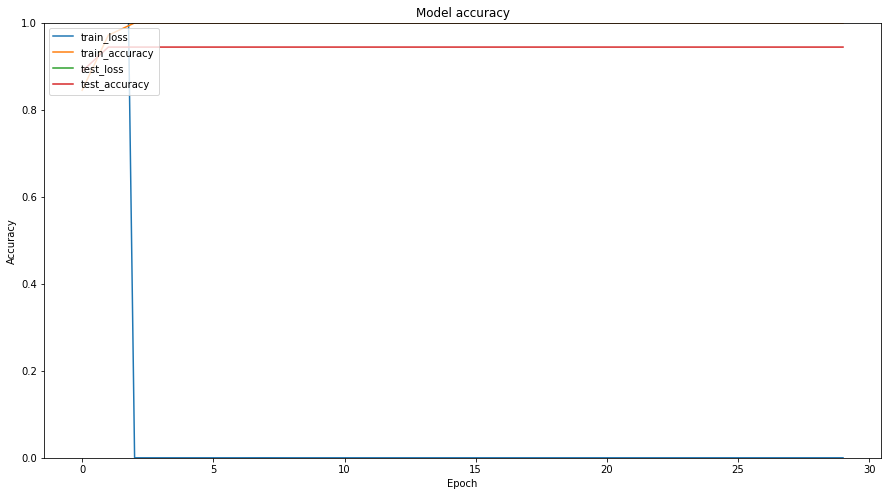

In [22]:
simple_model = simple_nn(data)

## CNN (Convolution Neural Network) model

In [23]:
def simple_cnn(data):

    X_train, X_test, y_train, y_test = preprocess_data(data)

    model = Sequential([
        layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    train_loss = []
    train_accuracy = []
    test_loss = []
    test_accuracy = []
    NUM_EPOCHs = 10
    for i in range(NUM_EPOCHs):
        history = model.fit(X_train, y_train, epochs=1, batch_size=8, verbose=0)
        
        train_loss.append(history.history['loss'][0])
        train_accuracy.append(history.history['accuracy'][0])

        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

        test_loss.append(loss)
        test_accuracy.append(accuracy)
        print(f'Epoch {i+1} => Test Loss: {loss*100:.2f}% - Test Accuracy: {accuracy*100:.2f}%')

    plt.figure(figsize=(15, 8))
    plt.plot(train_loss, label='train_loss')
    plt.plot(train_accuracy, label='train_accuracy')
    plt.plot(test_loss, label='test_loss')
    plt.plot(test_accuracy, label='test_accuracy')
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend(loc='upper left')
    plt.show()

    return model

Epoch 1 => Test Loss: 835.38% - Test Accuracy: 94.44%
Epoch 2 => Test Loss: 633.33% - Test Accuracy: 83.33%
Epoch 3 => Test Loss: 710.08% - Test Accuracy: 94.44%
Epoch 4 => Test Loss: 165.26% - Test Accuracy: 94.44%
Epoch 5 => Test Loss: 97.50% - Test Accuracy: 88.89%
Epoch 6 => Test Loss: 70.28% - Test Accuracy: 94.44%
Epoch 7 => Test Loss: 242.60% - Test Accuracy: 94.44%
Epoch 8 => Test Loss: 107.22% - Test Accuracy: 94.44%
Epoch 9 => Test Loss: 50.88% - Test Accuracy: 94.44%
Epoch 10 => Test Loss: 27.80% - Test Accuracy: 94.44%


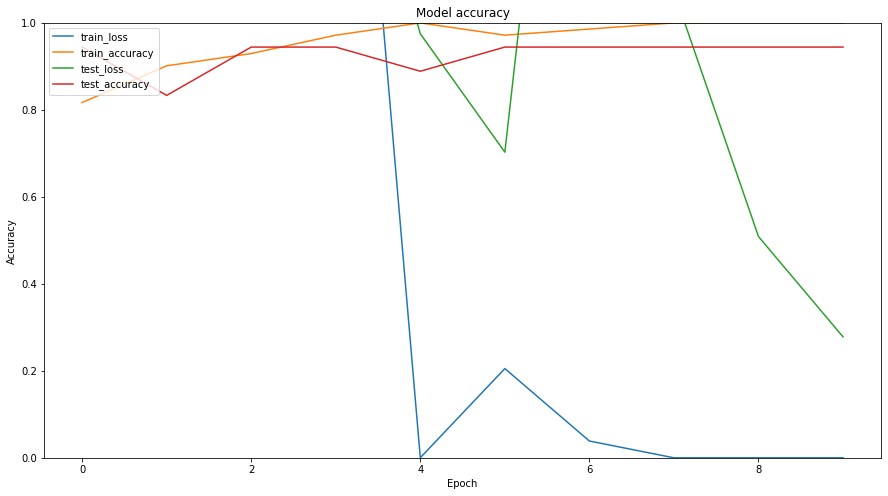

In [24]:
simple_cnn_model = simple_cnn(data)

## SVM (Support Vector Machine) model

## Report